# Support Vector Machines

## 1) Import libraries and dataset

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.shape

(400, 5)

## 2) Data exploration 
Before we go on with Support Vector Machines, let's first understand the dataset a bit better.

In [3]:
# Exploring the dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


The dataset includes 400 observations, 4 features (User ID, Gender, Age, EstimatedSalary) and 1 target variable (Purchased). Given the name of the csv file, the target variable might indicate whether or not a person purchased an article that was advertised on a social network. Let's further explore the distribution of the features and the target variable.

In [4]:
df['User ID'].duplicated().sum()   # --> no duplicate User IDs in dataset

0

In [5]:
df.Gender.value_counts()           # --> gender is relative balanced in dataset

Female    204
Male      196
Name: Gender, dtype: int64

18 60


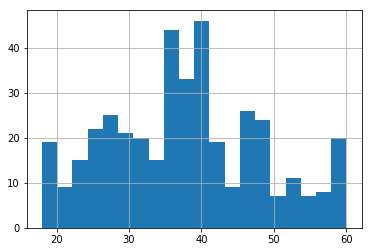

In [6]:
print(df.Age.min(), df.Age.max())  # --> age range between 18 and 60 years
df.Age.hist(bins=20);   

15000 150000


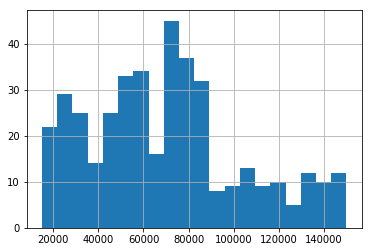

In [7]:
print(df.EstimatedSalary.min(), df.EstimatedSalary.max())  # --> est. salary ranges between 15k and 150k
df.EstimatedSalary.hist(bins=20);  

In [8]:
df.Purchased.value_counts()  # --> more non-purchased than purchased

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
# missing values  # --> no missing values
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## 3) Data preprocessing (for modeling)

In [10]:
# split dataset into independent variables (X) and dependent variable (y)

X = df.iloc[:, [2,3]].values  # take only age and estimated salary for now
y = df.iloc[:, 4].values      # purchased

In [11]:
# split dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [12]:
# feature scaling: standardize features (to mean=0, sd=1) using sklearn's StandardScaler
# Note: we scale also the test data, but based on the mean/sd of the train data

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
# check scaling
# Note: the mean/sd of the test data may not be perfectly 0/1, since it is scaled based on the train data

X_train.mean().round(2), X_test.mean().round(2), X_train.std().round(2), X_test.std().round(2)

(0.0, -0.08, 1.0, 1.05)

## 4a) Predictive modeling with SVM - linear kernel

In [24]:
# fit the SV classifier to the train set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
# make predictions for the test set

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

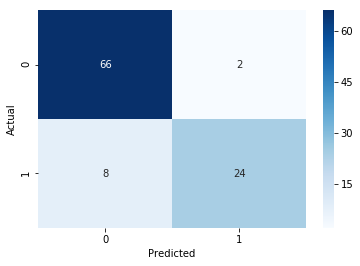

In [26]:
# build and plot the Confusion Matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sns.heatmap(cm, cmap='Blues', annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted');

In [27]:
# preprate visualization of training set results

# this makes a 2D meshgrid based on two vectors/arrays: 
#  - in x-direction: based on the standardized 'Age' feature, in steps of 0.01 from min-1 to max+1
#  - in y-direction: based on the standardized 'EstimatedSalary' feature, in steps of 0.01 from min-1 to max+1

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X1.shape, X2.shape,   X1.ravel().shape, X2.ravel().shape

((592, 616), (592, 616), (364672,), (364672,))

In [28]:
np.array([X1.ravel(), X2.ravel()]).T.shape

(364672, 2)

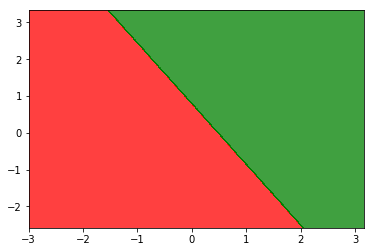

In [29]:
# this plots the prediction from the classifier for each Age/Salary point on the grid:
#  - green area = predicted purchase (1)
#  - red area = predicted non-purchase(0)

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')));

#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max());

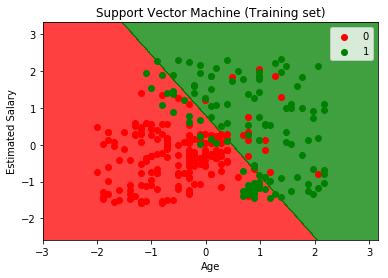

In [30]:
# on top of that, we then plot the true values (red=0, green=1) for all age/salary pairs in the dataset
#  - first iteration of loop (i=0, j=0):  add points where y=0 (in red)
#  - second iteration of loop (i=1, j=1): add points where y=1 (in green)

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')));
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],    #  Age, Salary for all points where y==j
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,4), label = j) # color/label points
                #c = ListedColormap(('red', 'green'))(i), label = j)  # throws a warning if entered like this
        
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

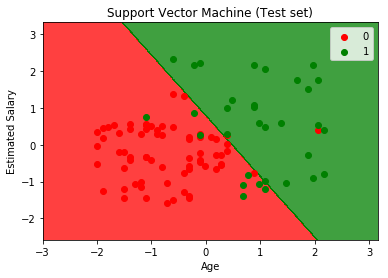

In [31]:
# visualise the test set results (see above for explanation of code lines)

from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,4), label = j)
                #c = ListedColormap(('red', 'green'))(i), label = j)  # throws a warning if entered like this
        
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

We see that both age and estimated salary positively predict purchase - i.e. purchase is most likely for people with higher age and salary and most unlikely for people with lower age and salary.

## 4b) Predictive modeling with SVM - non-linear kernel

In [32]:
# fit the SV classifier to the train set

from sklearn.svm import SVC
classifier = SVC(random_state = 0)  # kernel = 'linear', 
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
# make predictions for the test set

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

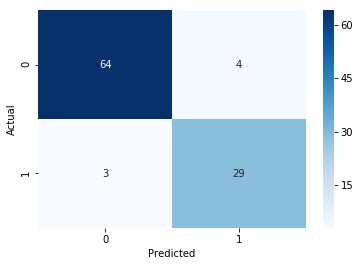

In [34]:
# build and plot the Confusion Matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sns.heatmap(cm, cmap='Blues', annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted');

In [35]:
# preprate visualization of training set results

# this makes a 2D meshgrid based on two vectors/arrays: 
#  - in x-direction: based on the standardized 'Age' feature, in steps of 0.01 from min-1 to max+1
#  - in y-direction: based on the standardized 'EstimatedSalary' feature, in steps of 0.01 from min-1 to max+1

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X1.shape, X2.shape,   X1.ravel().shape, X2.ravel().shape

((592, 616), (592, 616), (364672,), (364672,))

In [36]:
np.array([X1.ravel(), X2.ravel()]).T.shape

(364672, 2)

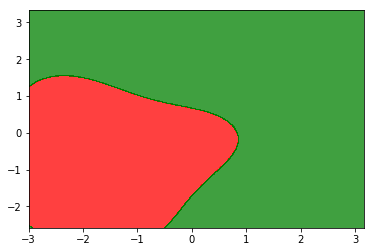

In [37]:
# this plots the prediction from the classifier for each Age/Salary point on the grid:
#  - green area = predicted purchase (1)
#  - red area = predicted non-purchase(0)

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')));

#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max());

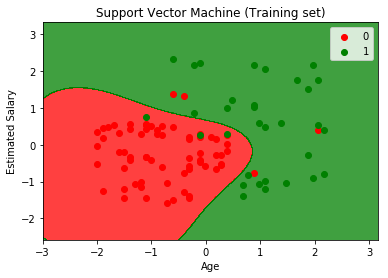

In [40]:
# on top of that, we then plot the true values (red=0, green=1) for all age/salary pairs in the dataset
#  - first iteration of loop (i=0, j=0):  add points where y=0 (in red)
#  - second iteration of loop (i=1, j=1): add points where y=1 (in green)

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')));
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],    #  Age, Salary for all points where y==j
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,4), label = j) # color/label points
                #c = ListedColormap(('red', 'green'))(i), label = j)  # throws a warning if entered like this
        
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

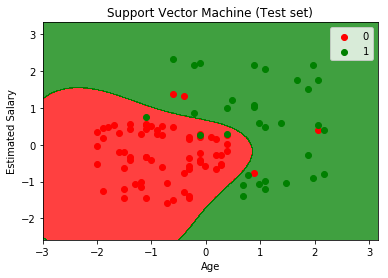

In [41]:
# visualise the test set results (see above for explanation of code lines)

from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,4), label = j)
                #c = ListedColormap(('red', 'green'))(i), label = j)  # throws a warning if entered like this
        
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

We see that both age and estimated salary positively predict purchase - i.e. purchase is most likely for people with higher age and salary and most unlikely for people with lower age and salary.